In [27]:
import pandas as pd
import yfinance as yf

def get_data(stock):
    #get historical stock data 
    YEARS = 3
    start = (pd.Timestamp.now() - pd.DateOffset(years=YEARS)).strftime('%Y-%m-%d')
    END = pd.Timestamp.now().strftime('%Y-%m-%d')
    stock_data = yf.download(stock, start=start, end=END)
    #stock_data['Date'] = stock_data.index
    stock_data.reset_index(inplace=True)
    #stock_data.reset_index(inplace=True, drop=False)
    # Calculate daily returns
    stock_data['Daily Return'] = stock_data['Close'].pct_change()
    
    
    # Separate gains and losses
    stock_data['Gain'] = stock_data['Daily Return'].apply(lambda x: x if x > 0 else 0)
    stock_data['Loss'] = stock_data['Daily Return'].apply(lambda x: -x if x < 0 else 0)
    
    # Calculate average gain and loss
    window = 14
    stock_data['Avg Gain'] = stock_data['Gain'].rolling(window=window).mean()
    stock_data['Avg Loss'] = stock_data['Loss'].rolling(window=window).mean()
    
    # Calculate RS and RSI
    stock_data['RS'] = stock_data['Avg Gain'] / stock_data['Avg Loss']
    stock_data['RSI'] = 100 - (100 / (1 + stock_data['RS']))
    
    # Calculate the 26-day moving average of the closing prices
    stock_data['MA_26_Day'] = stock_data['Close'].rolling(window=26).mean()

    # Return the final DataFrame
    return stock_data[['Date','Close', 'MA_26_Day', 'RSI', 'Volume']]

print(get_data('TSM'))

[*********************100%%**********************]  1 of 1 completed
          Date       Close   MA_26_Day        RSI    Volume
0   2021-03-05  120.800003         NaN        NaN  17448700
1   2021-03-08  113.930000         NaN        NaN  17246900
2   2021-03-09  116.379997         NaN        NaN  17717100
3   2021-03-10  113.830002         NaN        NaN  15240300
4   2021-03-11  120.580002         NaN        NaN  15091600
..         ...         ...         ...        ...       ...
749 2024-02-27  128.589996  122.851154  64.889797   8851800
750 2024-02-28  127.379997  123.403077  54.994493   6519100
751 2024-02-29  128.669998  123.962308  38.977264   9369900
752 2024-03-01  133.899994  124.630769  52.004267  24361700
753 2024-03-04  138.259995  125.465385  63.981283  26544600

[754 rows x 5 columns]


[*********************100%%**********************]  1 of 1 completed


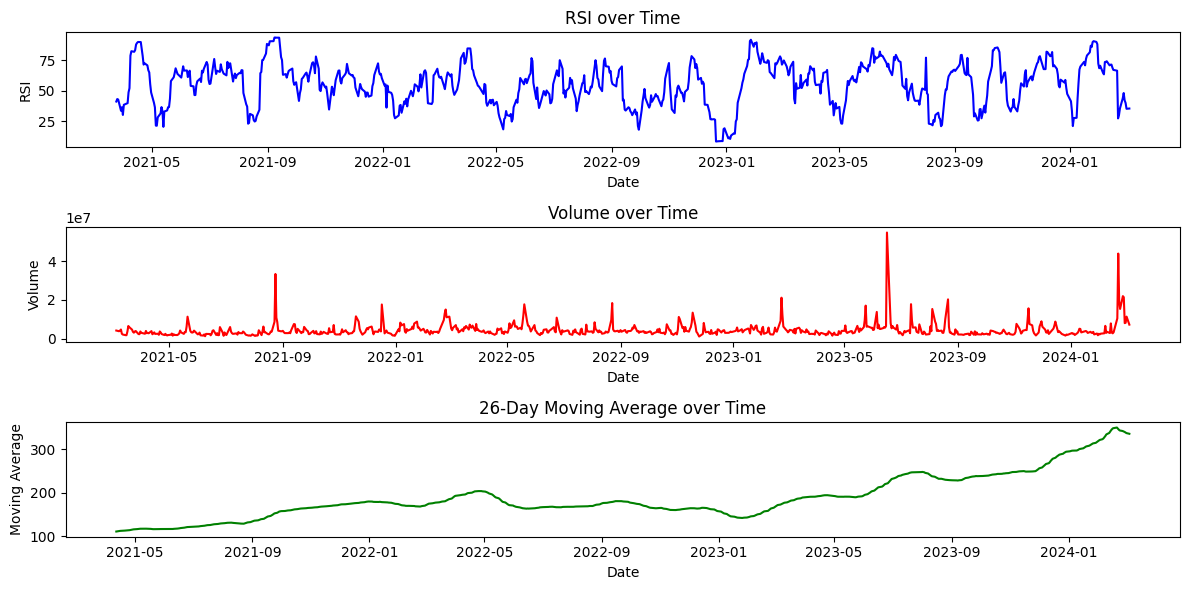

In [30]:
import matplotlib.pyplot as plt
# Plotting
stock = 'PANW'
data = get_data(stock)

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(data['Date'], data['RSI'], color='blue')
plt.title('RSI over Time')
plt.xlabel('Date')
plt.ylabel('RSI')

plt.subplot(3, 1, 2)
plt.plot(data['Date'], data['Volume'], color='red')
plt.title('Volume over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

plt.subplot(3, 1, 3)
plt.plot(data['Date'], data['MA_26_Day'], color='green')
plt.title('26-Day Moving Average over Time')
plt.xlabel('Date')
plt.ylabel('Moving Average')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Price')

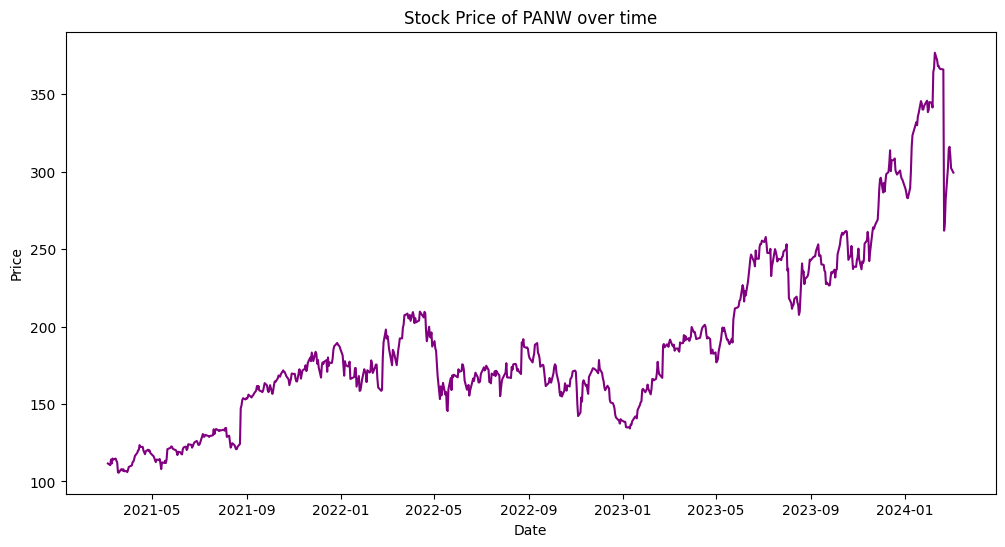

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], color='Purple')
plt.title(f'Stock Price of {stock} over time')
plt.xlabel('Date')
plt.ylabel('Price')